In [31]:
#https://onlytojay.medium.com/mnist-cnn-optimizer-comparison-with-tensorflow-keras-163735862ecd
#https://keras.io/api/layers/convolution_layers/convolution2d/


In [32]:
from tensorflow.keras.datasets import mnist
import numpy as np

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = np.expand_dims(X_train, 3)
X_test = np.expand_dims(X_test, 3)


In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=X_train[0].shape))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [34]:
model.compile(optimizer="Adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=32, epochs=5, verbose=2, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 - 11s - loss: 0.6083 - accuracy: 0.9049 - val_loss: 0.1423 - val_accuracy: 0.9586 - 11s/epoch - 6ms/step
Epoch 2/5
1875/1875 - 8s - loss: 0.0987 - accuracy: 0.9703 - val_loss: 0.0852 - val_accuracy: 0.9744 - 8s/epoch - 4ms/step
Epoch 3/5
1875/1875 - 7s - loss: 0.0713 - accuracy: 0.9783 - val_loss: 0.0698 - val_accuracy: 0.9794 - 7s/epoch - 4ms/step
Epoch 4/5
1875/1875 - 9s - loss: 0.0595 - accuracy: 0.9816 - val_loss: 0.0719 - val_accuracy: 0.9788 - 9s/epoch - 5ms/step
Epoch 5/5
1875/1875 - 9s - loss: 0.0539 - accuracy: 0.9829 - val_loss: 0.0551 - val_accuracy: 0.9829 - 9s/epoch - 5ms/step


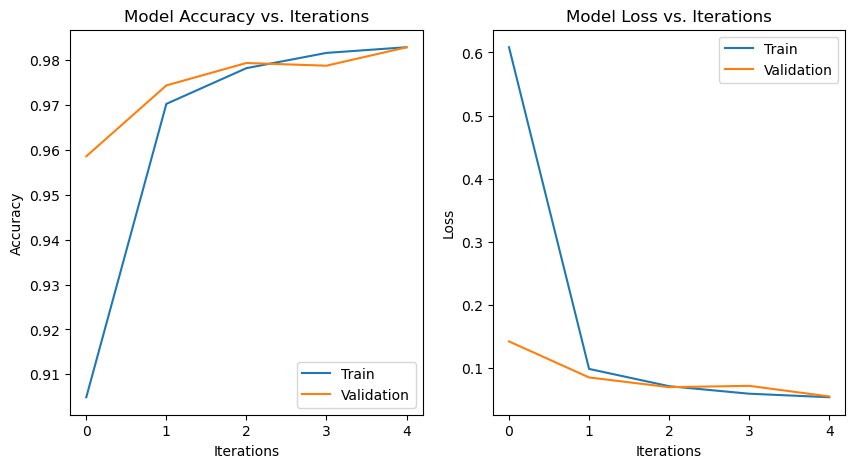

In [35]:
import matplotlib.pyplot as plt

figures, axes = plt.subplots(1,2,figsize=(10,5))

axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_title('Model Accuracy vs. Iterations')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Iterations')
axes[0].legend(['Train', 'Validation'], loc='lower right')

axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('Model Loss vs. Iterations')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Iterations')
axes[1].legend(['Train', 'Validation'], loc='upper right')

plt.show()